# Called Third Strike
## Part 3. First crude neural network  

![](./resources/baseball_umpire_home_plate_1.jpg)

This project's goal is to build probability models for as to whether a pitch will be called a strike or not. The intended models are to be:
1. A neural network (NN) based approach.
2. A non-NN based approach.

---

__**This Notebook's**__ objective is to quickly build a simple working neural network to give a baseline to compare against as we iterate versions. 

---

### Table of Contents

<a href='#data_prep'>1. Data Preprocessing</a>

---  
<span style="font-size:0.5em;">Tag 1</span>

### Data Preprocessing<a id='data_prep'></a>

#### Libraries


In [45]:
# Data wrangling
import pandas as pd


# ML
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# neural networks


In [8]:
%%capture
!pip install pydot

👆 Dependency for plot_model

#### Data Import 

Retrieve the latest version of our train/test files that we built during [initial exploration](02_data_exploration.ipynb).

In [10]:
df_train = pd.read_pickle('../data/train_enriched.pkl')
df_test = pd.read_pickle('../data/test_enriched.pkl')

Let's refamiliarize ourselves with the features.

In [12]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 353983 entries, 0 to 354038
Data columns (total 31 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   pitch_id              353983 non-null  object        
 1   inning                353983 non-null  int64         
 2   side                  353983 non-null  object        
 3   run_diff              353983 non-null  int64         
 4   at_bat_index          353983 non-null  int64         
 5   pitch_of_ab           353983 non-null  int64         
 6   batter                353983 non-null  int64         
 7   pitcher               353983 non-null  int64         
 8   catcher               353983 non-null  int64         
 9   umpire                353983 non-null  int64         
 10  bside                 353983 non-null  object        
 11  pside                 353983 non-null  object        
 12  stringer_zone_bottom  353983 non-null  float64       
 13 

For our initial super simple model, let's just pick four features: 
- `px` which is the horizontal location of the pitch at the plate
- `pz` which is the vertical location
- `stringer_zone_bottom` which is an estimate of current batter's strike zone bottom
- `stringer_zone_top` which is an estimate of current batter's strike zone top

In [13]:
# Features selected
feat_select = ['px', 'pz', 'stringer_zone_bottom', 'stringer_zone_top']

Prep features:

In [41]:
# Get just the selected features
df_X = df_train[feat_select]
display(df_X.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 353983 entries, 0 to 354038
Data columns (total 4 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   px                    353983 non-null  float64
 1   pz                    353983 non-null  float64
 2   stringer_zone_bottom  353983 non-null  float64
 3   stringer_zone_top     353983 non-null  float64
dtypes: float64(4)
memory usage: 21.6 MB


None

While we are at it, let's prep our targets:

In [42]:
df_y = df_train['strike_bool']
display(pd.DataFrame(df_y).info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 353983 entries, 0 to 354038
Data columns (total 1 columns):
 #   Column       Non-Null Count   Dtype
---  ------       --------------   -----
 0   strike_bool  353983 non-null  int64
dtypes: int64(1)
memory usage: 13.5 MB


None

For a neural network we will need to numerically represent our data (e.g. one-hot-encode any categorical features), as well as scale/normalize the data.

In [44]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_X)

Create train/test splits

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, df_y, test_size=0.20, stratify=df_y)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 10)                50        
                                                                 
 dense_17 (Dense)            (None, 1)                 11        
                                                                 
Total params: 61
Trainable params: 61
Non-trainable params: 0
_________________________________________________________________


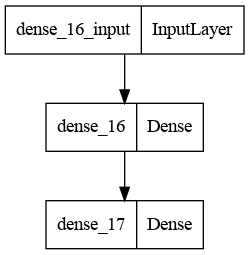

In [50]:
# Import the Sequential model and Dense layer
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model

# Create a Sequential model
model = Sequential()

# Add an input layer and a hidden layer with 10 neurons
model.add(Dense(10, input_shape=(4,), activation="sigmoid"))

# Add a 1-neuron output layer
model.add(Dense(1, activation="sigmoid"))

# Compile your model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Summarise your model
model.summary()

plot_model(model)

In [51]:
# Train your model
n_epochs = 5
model.fit(X_train, y_train, epochs = n_epochs, validation_split=0.10)

Epoch 1/5
7965/7965 [==============================] - 8s 1ms/step - loss: 0.5236 - accuracy: 0.7400 - val_loss: 0.3427 - val_accuracy: 0.8948
Epoch 2/5
7965/7965 [==============================] - 8s 1ms/step - loss: 0.2507 - accuracy: 0.9118 - val_loss: 0.2065 - val_accuracy: 0.9166
Epoch 3/5
7965/7965 [==============================] - 8s 1ms/step - loss: 0.1938 - accuracy: 0.9196 - val_loss: 0.1882 - val_accuracy: 0.9205
Epoch 4/5
7965/7965 [==============================] - 8s 998us/step - loss: 0.1824 - accuracy: 0.9232 - val_loss: 0.1812 - val_accuracy: 0.9238
Epoch 5/5
7965/7965 [==============================] - 8s 991us/step - loss: 0.1769 - accuracy: 0.9249 - val_loss: 0.1769 - val_accuracy: 0.9254


In [54]:
# Evaluate your model accuracy on the test set
accuracy = model.evaluate(X_test, y_test)[1]

# Print accuracy
print('Accuracy:', accuracy)

2213/2213 [==============================] - 2s 774us/step - loss: 0.1754 - accuracy: 0.9246
Accuracy: 0.9245730638504028
